## 1 Introduction

Is the average freight price significantly different between shipping companies?


I will be using the Northwind Traders Access database to perform a hypothesis test to answer the following question.  **Is there cost of shipping related to the shipment company? **<br> 
Followed by at least 3 additional hypothesis tests.  <br>

**Synopsis of Dataset**<br>
"The Northwind database is a sample database used by Microsoft to demonstrate the features of some of its products, including SQL Server and Microsoft Access. The database contains the sales data for Northwind Traders, a fictitious specialty foods export/import company." 
<br>

**Null Hypothesis** <br>
An order will cost the same regardless of which shipping company is used. <br>

**Alternative Hypothesis** <br>
One company is cheaper than the other 2.<br>

**Effect Size**<br>
I'm only intersted in a difference larger than 5% as there may be a convenience issue with using one service over another and 5% is a safe margin. 

**Variables We Are Interested in Determining the Relationship Between**<br>
The cost of the shipment and the company being used to ship the order.

### 1.1 Loading Libraries

In [1]:
# add every library I will use throughout the project here
import pandas as pd
import numpy as np
import sqlite3
import scipy.stats as stat
from scipy import stats
from __future__ import print_function


#data visualization imports
import matplotlib.pyplot as plt
import seaborn as sns


#for t-tests
from scipy.stats import ttest_ind

#for ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


import scipy.stats as stats

Is the mean freight price significantly different between shipping companies?


### 1.2 Retrieve data from database

In [2]:
conn = sqlite3.connect('Northwind_small.sqlite')
cursor = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [3]:
for row in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('Employee',)
('Category',)
('Customer',)
('Shipper',)
('Supplier',)
('Order',)
('Product',)
('OrderDetail',)
('CustomerCustomerDemo',)
('CustomerDemographic',)
('Region',)
('Territory',)
('EmployeeTerritory',)


In [4]:
pd.read_sql_query("SELECT * FROM Shipper ;", conn)

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [5]:
pd.read_sql_query("SELECT * FROM [Order] LIMIT 1;", conn)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France


In [6]:
Speedy_North_America =pd.read_sql_query('''
                                SELECT (ShipVia)Company, (Freight)Cost, ShipRegion,
                                (julianday( o.RequiredDate) - julianday(o.ShippedDate)) delivery_window 
                                FROM [Order] o
                                WHERE o.ShipRegion = "North America" AND o.ShipVia = 1;
                                        ''', conn)

In [7]:
United_North_America = pd.read_sql_query('''
                                SELECT (ShipVia)Company, (Freight)Cost, ShipRegion,
                                (julianday( o.RequiredDate) - julianday(o.ShippedDate)) delivery_window
                                FROM [Order] o
                                WHERE o.ShipRegion = "North America" AND o.ShipVia = 2;
                                        ''', conn)

In [8]:
Federal_North_America = pd.read_sql_query('''
                                SELECT (ShipVia)Company, (Freight)Cost, ShipRegion,
                                (julianday( o.RequiredDate) - julianday(o.ShippedDate)) delivery_window
                                FROM [Order] o
                                WHERE o.ShipRegion = "North America" AND o.ShipVia = 3;
                                        ''', conn)

In [9]:
all_companies = pd.read_sql_query('''
                        SELECT (ShipVia)Company, (Freight)Cost, ShipRegion,
                        (julianday( o.RequiredDate) - julianday(o.ShippedDate)) delivery_window
                        FROM [Order] o
                        WHERE o.ShipRegion = "North America"
                                        ; ''', conn)

Is the average cost of shipping per order increasing each year?  

### 1.3 Data structure and content

## 2 Experiment Design

### 3.4 ANOVA

In [10]:
all_companies['Cost'].groupby(all_companies['Company']).describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
1,35.0,73.680571,69.208836,0.20,18.2950,52.52,128.1950,232.55
2,61.0,112.201311,182.371436,0.56,15.6600,44.72,90.9700,830.75
3,56.0,116.897857,151.390535,0.53,14.8375,54.02,145.8225,708.95


In [11]:
# wrap with C() to indicate categorical variable
results = ols('Cost ~ C(Company)', data=all_companies).fit()

In [12]:
aov_table = sm.stats.anova_lm(results, typ=1)
print(aov_table)

               df        sum_sq       mean_sq         F    PR(>F)
C(Company)    2.0  4.542185e+04  22710.924364  0.989752  0.374099
Residual    149.0  3.418966e+06  22946.080279       NaN       NaN


In [13]:
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

                  sum_sq     df         F    PR(>F)
C(Company)  4.542185e+04    2.0  0.989752  0.374099
Residual    3.418966e+06  149.0       NaN       NaN


In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  1      2    38.5207  -37.5276 114.5691 False 
  1      3    43.2173  -34.0589 120.4935 False 
  2      3     4.6965  -61.6758 71.0689  False 
-----------------------------------------------


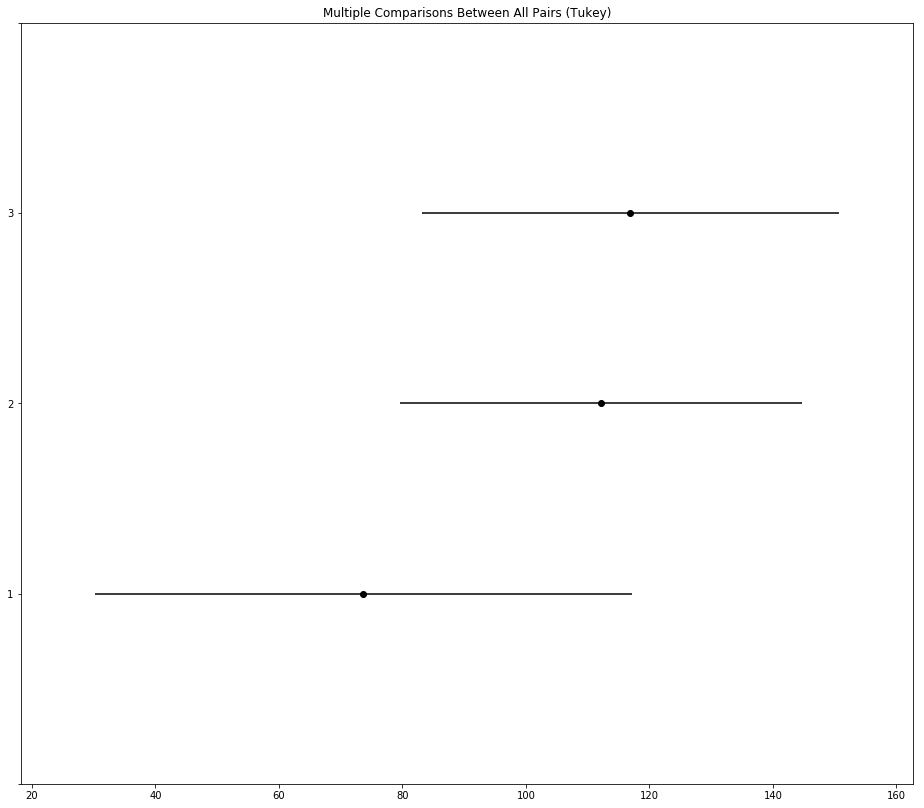

In [23]:
mc = MultiComparison(all_companies['Cost'], all_companies['Company'])
mc_results = mc.tukeyhsd()
print(mc_results)

mc_results = mc_results.plot_simultaneous(figsize=(16,14))

plt.show()
mc_results.savefig("mc_results3.png", bbox_inches='tight')

Conclusion:
All companies cost roughly the same amount when shipping therefore, use whatever is most convenient at the time.